In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:

transactions_data = pd.read_csv('../data/transactions.csv')
clients_data = pd.read_csv('../data/clients.csv')
actions_data = pd.read_csv('../data/actions.csv')

datasets = {
    'Transactions': transactions_data.head(),
    'Clients': clients_data.head(),
    'Actions': actions_data.head()
}

datasets

{'Transactions':    client_id transaction_id transaction_date  product_quantity  \
 0  c17974679      t11288118       2020-07-25                 1   
 1  c17974679      t93389142       2020-06-20                 1   
 2  c17974679      t62924895       2021-01-13                 1   
 3  c17974679      t93389142       2020-06-20                 1   
 4  c17974679      t33368160       2021-05-03                 1   
 
    gross_amount_euro     product_category product_subcategory    product_style  
 0               3044  Women Ready-to-Wear             Unknown     Casual Style  
 1                569      Women Accessory             Unknown  Stylish Fashion  
 2               7727           Women Bags             Unknown          Leather  
 3               3954  Women Ready-to-Wear             Unknown     Casual Style  
 4               1541  Women Ready-to-Wear      bottom segment     Casual Style  ,
 'Clients':    client_id client_country client_gender client_nationality client_city  \

In [9]:
# Summary statistics 
summary_statistics = {
    'Transactions': transactions_data.describe(include='all'),
    'Clients': clients_data.describe(include='all'),
    'Actions': actions_data.describe(include='all')
}
summary_statistics

{'Transactions':         client_id transaction_id transaction_date  product_quantity  \
 count       54638          54638            54638      54638.000000   
 unique      13884          35452             1480               NaN   
 top     c81328703      t89681432       2021-01-04               NaN   
 freq          394             40              276               NaN   
 mean          NaN            NaN              NaN          1.022384   
 std           NaN            NaN              NaN          0.427936   
 min           NaN            NaN              NaN          1.000000   
 25%           NaN            NaN              NaN          1.000000   
 50%           NaN            NaN              NaN          1.000000   
 75%           NaN            NaN              NaN          1.000000   
 max           NaN            NaN              NaN         36.000000   
 
         gross_amount_euro product_category product_subcategory product_style  
 count        5.463800e+04            

In [10]:
# Checking for missing values 
missing_values = {
    'Transactions': transactions_data.isnull().sum(),
    'Clients': clients_data.isnull().sum(),
    'Actions': actions_data.isnull().sum()
}

missing_values

{'Transactions': client_id              0
 transaction_id         0
 transaction_date       0
 product_quantity       0
 gross_amount_euro      0
 product_category       0
 product_subcategory    0
 product_style          7
 dtype: int64,
 'Clients': client_id                                      0
 client_country                              9656
 client_gender                              16207
 client_nationality                         16150
 client_city                                18264
 client_segment                                 0
 client_premium_status                          0
 client_is_phone_contactable                    0
 client_is_email_contactable                    0
 client_is_instant_messaging_contactable        0
 client_is_contactable                          0
 dtype: int64,
 'Actions': action_id                      0
 action_type_label              0
 action_subcategory_label       0
 action_start_date              0
 action_year                    0
 act

# Actions Data

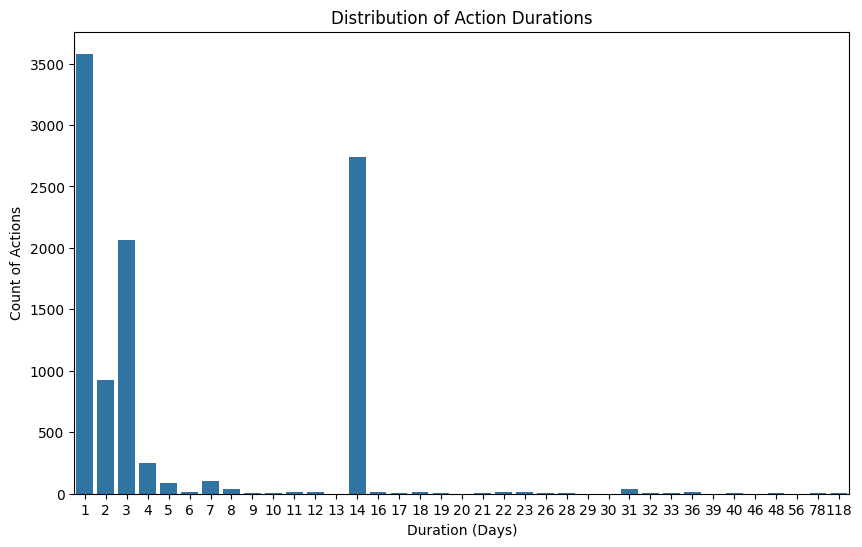

In [11]:

actions_data['action_start_date'] = pd.to_datetime(actions_data['action_start_date'])
actions_data['action_end_date'] = pd.to_datetime(actions_data['action_end_date'])

# Calculate the duration of the events
actions_data['action_duration'] = (actions_data['action_end_date'] - actions_data['action_start_date']).dt.days + 1


plt.figure(figsize=(10, 6))
sns.countplot(x='action_duration', data=actions_data)
plt.title('Distribution of Action Durations')
plt.xlabel('Duration (Days)')
plt.ylabel('Count of Actions')
plt.show()


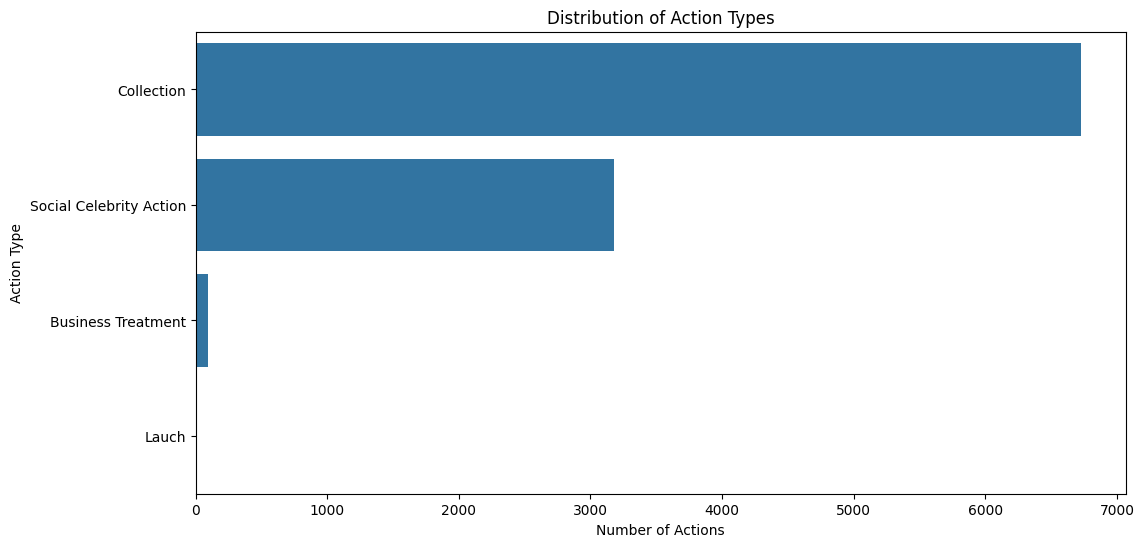

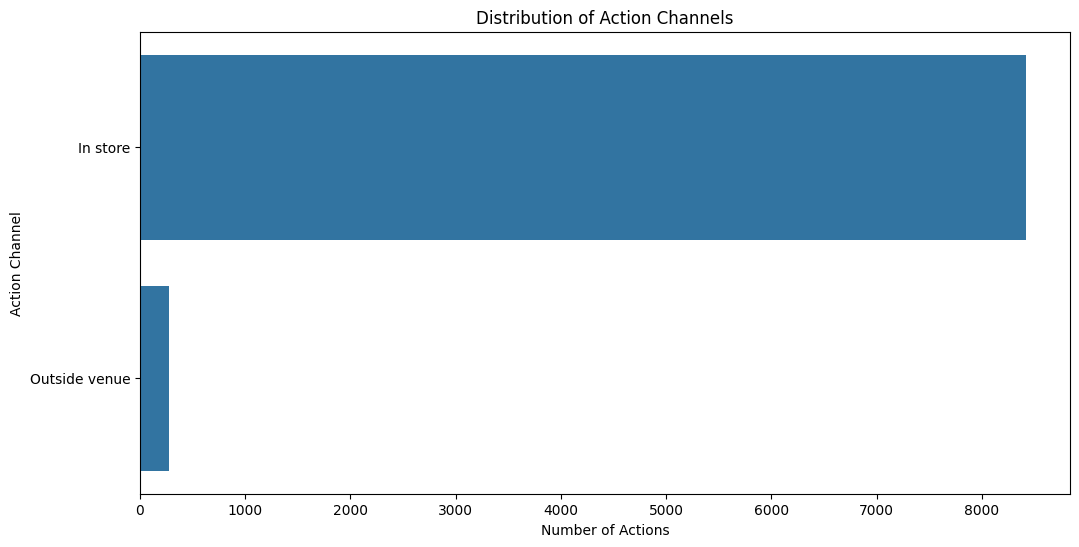

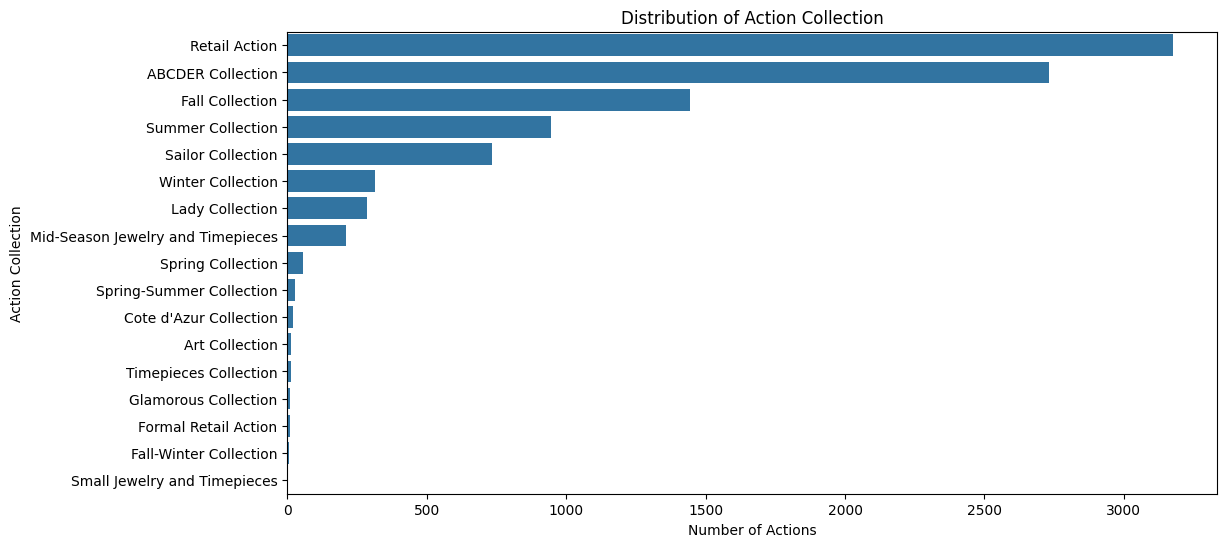

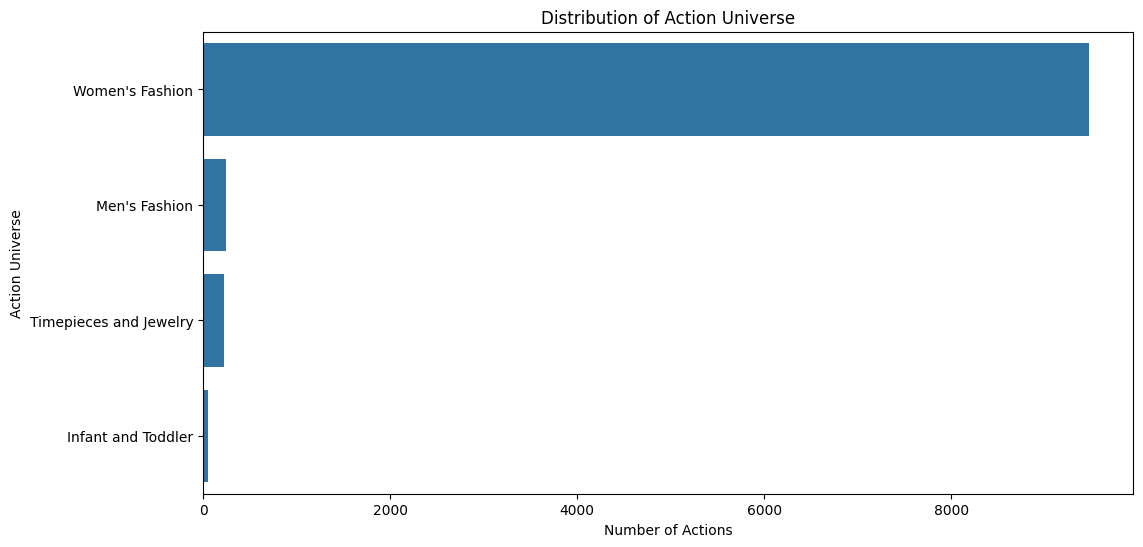

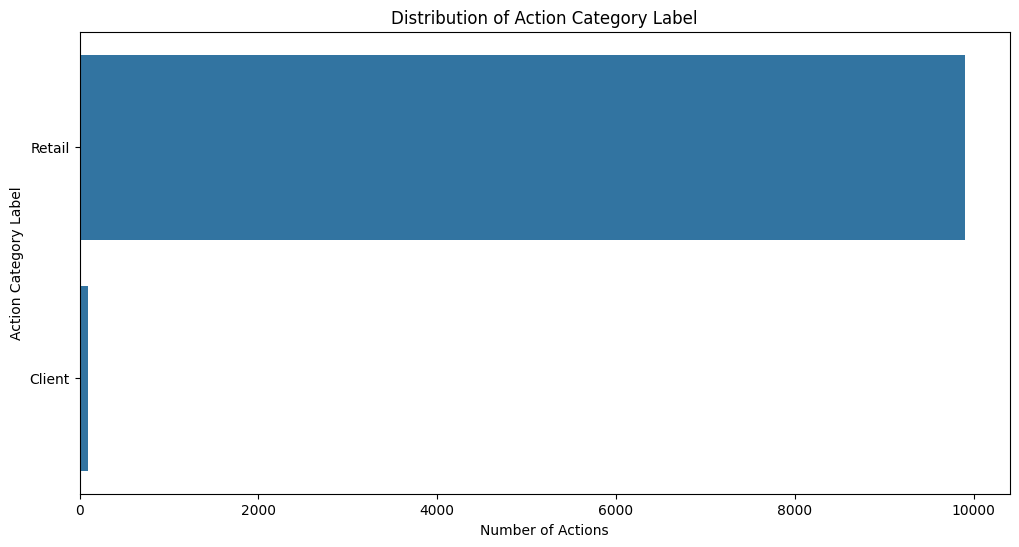

In [16]:
#action_collection	action_universe	action_category_label

plt.figure(figsize=(12, 6))
sns.countplot(y='action_type_label', data=actions_data, order=actions_data['action_type_label'].value_counts().index)
plt.title('Distribution of Action Types')
plt.xlabel('Number of Actions')
plt.ylabel('Action Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='action_channel', data=actions_data, order=actions_data['action_channel'].value_counts().index)
plt.title('Distribution of Action Channels')
plt.xlabel('Number of Actions')
plt.ylabel('Action Channel')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='action_collection', data=actions_data, order=actions_data['action_collection'].value_counts().index)
plt.title('Distribution of Action Collection')
plt.xlabel('Number of Actions')
plt.ylabel('Action Collection')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='action_universe', data=actions_data, order=actions_data['action_universe'].value_counts().index)
plt.title('Distribution of Action Universe')
plt.xlabel('Number of Actions')
plt.ylabel('Action Universe')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='action_category_label', data=actions_data, order=actions_data['action_category_label'].value_counts().index)
plt.title('Distribution of Action Category Label')
plt.xlabel('Number of Actions')
plt.ylabel('Action Category Label')
plt.show()

In [31]:
# Group by action type and
action_type_insights = actions_data.groupby('action_type_label').agg(
    count=('action_id', 'count'),
    mean_duration=('action_duration', 'mean')
).reset_index().sort_values('count', ascending=False)

# Group by action channel
action_channel_insights = actions_data.groupby('action_channel').agg(
    count=('action_id', 'count'),
    mean_duration=('action_duration', 'mean')
).reset_index().sort_values('count', ascending=False)

# Group by action year
action_year_insights = actions_data.groupby('action_year').agg(
    count=('action_id', 'count'),
    mean_duration=('action_duration', 'mean')
).reset_index().sort_values('count', ascending=False)

# Group by action collection 
action_collection_insights = actions_data.groupby('action_collection').agg(
    count=('action_id', 'count')
).reset_index().sort_values('count', ascending=False)


action_type_insights.head()


,action_type_label,count,mean_duration
1,Collection,6730,7.698514
3,Social Celebrity Action,3176,1.635705
0,Business Treatment,93,3.634409
2,Lauch,1,2.000000


In [32]:
action_channel_insights.head()

,action_channel,count,mean_duration
0,In store,8416,6.023645
1,Outside venue,273,9.117216


In [33]:
action_year_insights

,action_year,count,mean_duration
0,2020,4916,9.284988
1,2021,4505,2.316981
2,2022,579,2.181347


In [34]:
action_collection_insights

,action_collection,count
9,Retail Action,3176
0,ABCDER Collection,2732
3,Fall Collection,1443
14,Summer Collection,944
10,Sailor Collection,735
16,Winter Collection,314
7,Lady Collection,286
8,Mid-Season Jewelry and Timepieces,211
12,Spring Collection,56
13,Spring-Summer Collection,27


In [35]:

transactions_data['transaction_date'] = pd.to_datetime(transactions_data['transaction_date'])

# Aggregating transactions data to get total spend, total transactions, and average spend per client
transactions_agg = transactions_data.groupby('client_id').agg(
    total_spend=('gross_amount_euro', 'sum'),
    total_transactions=('transaction_id', 'nunique'),
    avg_transaction_amount=('gross_amount_euro', 'mean')
).reset_index()

# Merging datasets
actions_clients = pd.merge(actions_data, clients_data, on='client_id', how='left')
actions_clients_transactions = pd.merge(actions_clients, transactions_agg, on='client_id', how='left')

action_type_transaction_insights = actions_clients_transactions.groupby('action_type_label').agg({
    'total_spend': ['mean', 'sum'],
    'total_transactions': ['mean', 'sum'],
    'avg_transaction_amount': ['mean', 'max']
}).reset_index()

action_type_transaction_insights


action_type_label    total_spend              total_transactions  \
                                     mean          sum               mean   
0       Business Treatment  178572.661972   12678659.0          21.225352   
1               Collection   50842.295186  184811743.0           8.382944   
2                    Lauch            NaN          0.0                NaN   
3  Social Celebrity Action   36669.090110   50053308.0           6.608791   

           avg_transaction_amount                
       sum                   mean           max  
0   1507.0            4008.441434  15550.200000  
1  30472.0            3461.017787  49367.000000  
2      0.0                    NaN           NaN  
3   9021.0            3026.078616  24921.571429

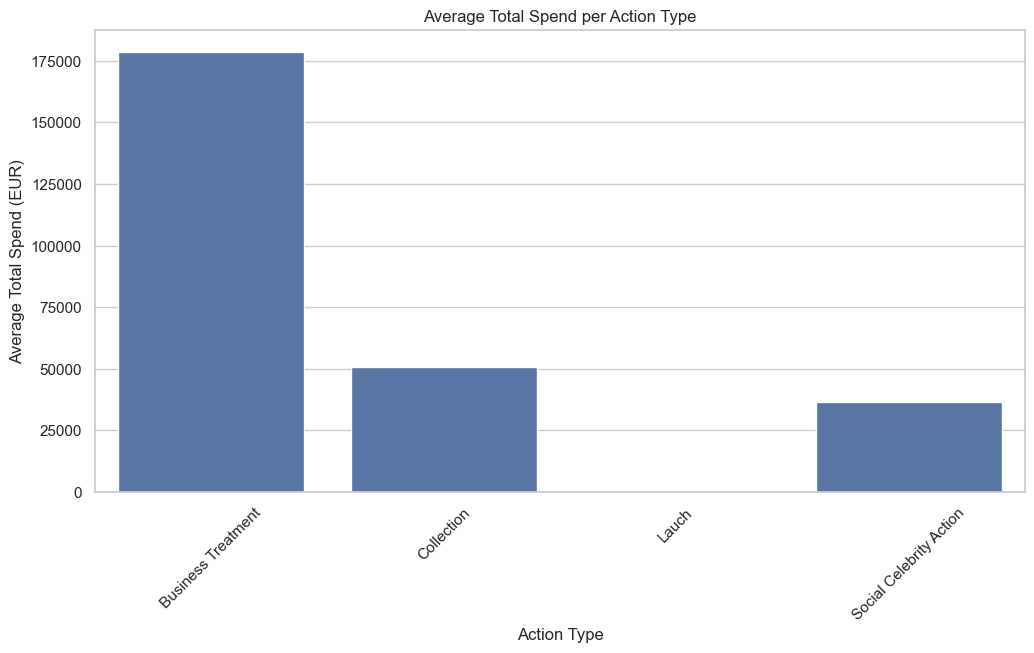

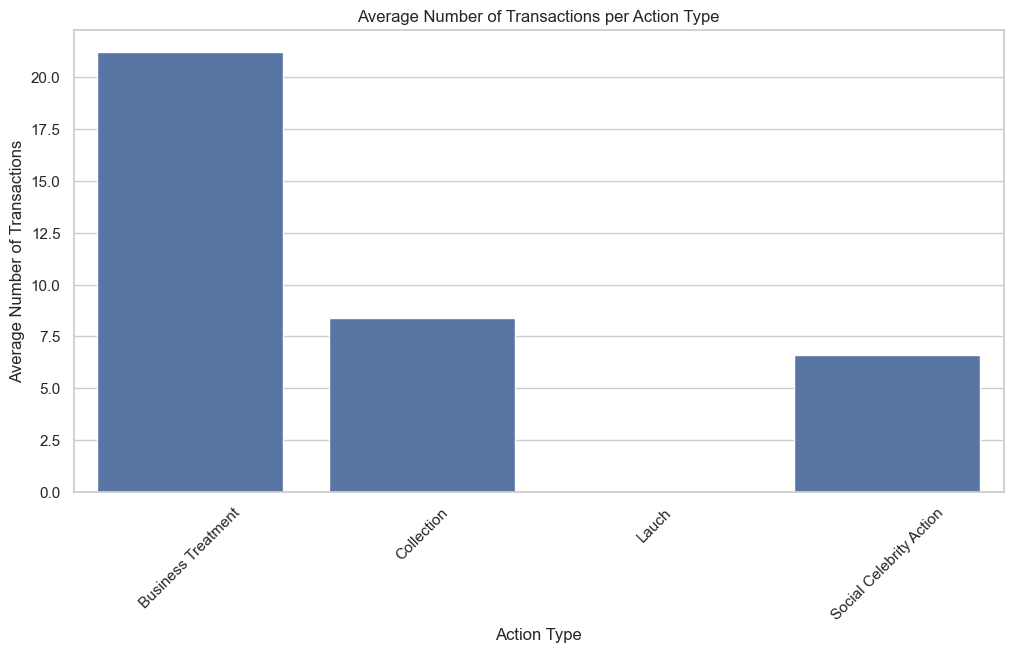

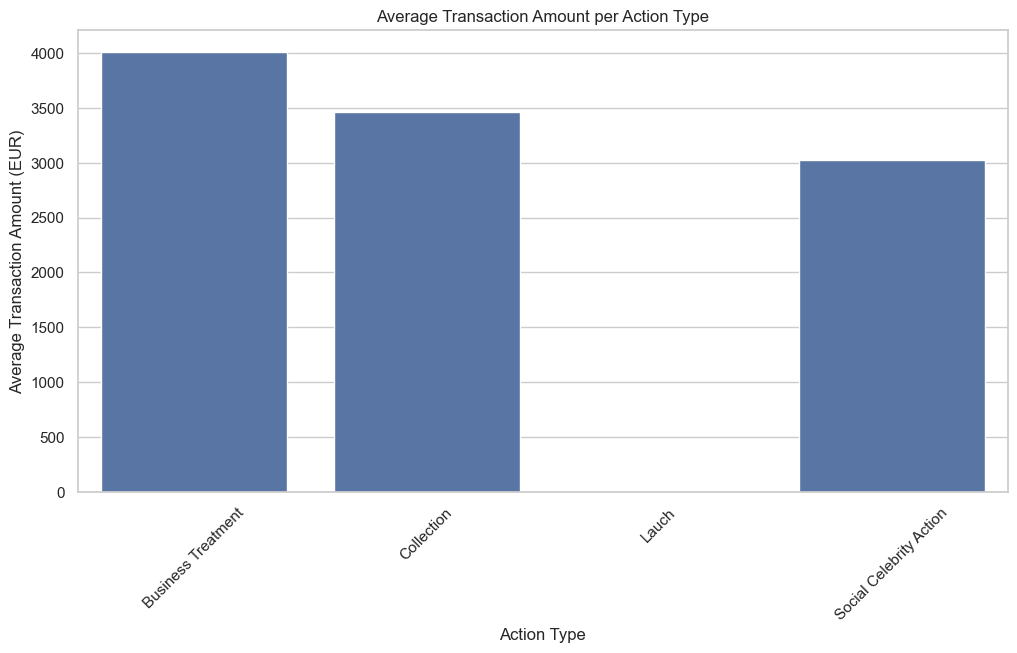

In [36]:

sns.set(style="whitegrid")

# average total spend per action type
plt.figure(figsize=(12, 6))
sns.barplot(x='action_type_label', y=('total_spend', 'mean'), data=action_type_transaction_insights)
plt.title('Average Total Spend per Action Type')
plt.xlabel('Action Type')
plt.ylabel('Average Total Spend (EUR)')
plt.xticks(rotation=45)
plt.show()

# average number of transactions per action type
plt.figure(figsize=(12, 6))
sns.barplot(x='action_type_label', y=('total_transactions', 'mean'), data=action_type_transaction_insights)
plt.title('Average Number of Transactions per Action Type')
plt.xlabel('Action Type')
plt.ylabel('Average Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# average transaction amount per action type
plt.figure(figsize=(12, 6))
sns.barplot(x='action_type_label', y=('avg_transaction_amount', 'mean'), data=action_type_transaction_insights)
plt.title('Average Transaction Amount per Action Type')
plt.xlabel('Action Type')
plt.ylabel('Average Transaction Amount (EUR)')
plt.xticks(rotation=45)
plt.show()


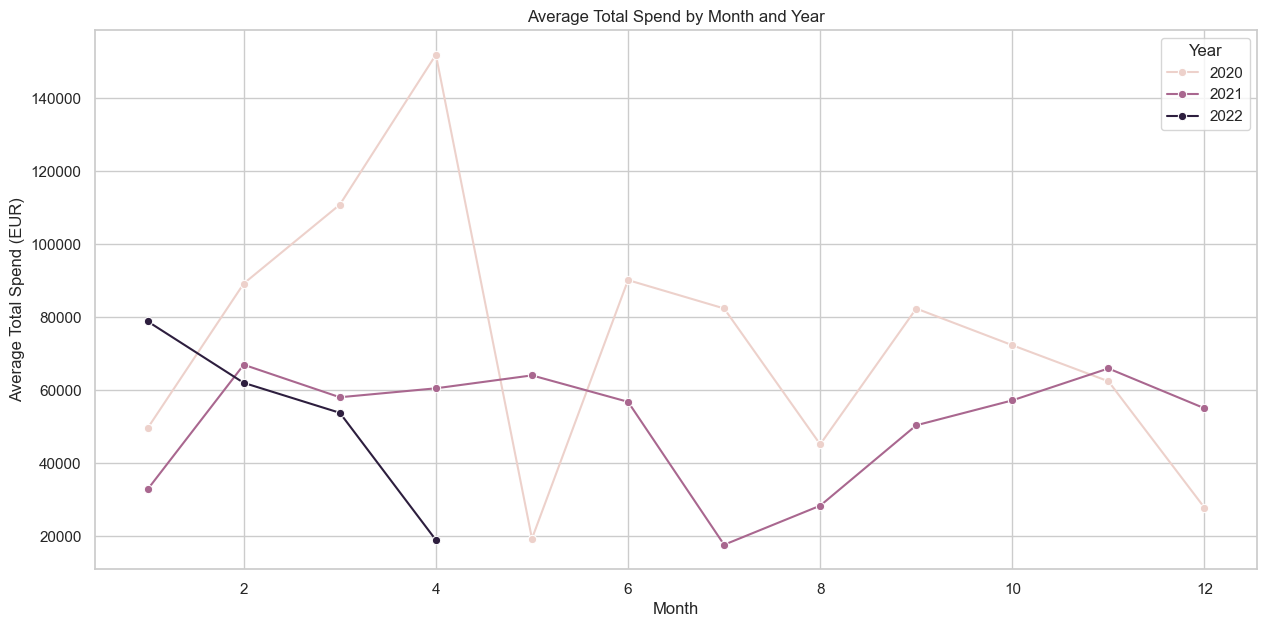

In [37]:

actions_clients_transactions['action_month'] = actions_clients_transactions['action_start_date'].dt.month
actions_clients_transactions['action_year'] = actions_clients_transactions['action_start_date'].dt.year

# Grouping by month and year to see the average total spend and transactions
monthly_spend = actions_clients_transactions.groupby(['action_year', 'action_month']).agg({
    'total_spend': 'mean',
    'total_transactions': 'mean'
}).reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x='action_month', y='total_spend', hue='action_year', data=monthly_spend, marker='o')
plt.title('Average Total Spend by Month and Year')
plt.xlabel('Month')
plt.ylabel('Average Total Spend (EUR)')
plt.legend(title='Year')
plt.show()


<Figure size 1200x600 with 0 Axes>

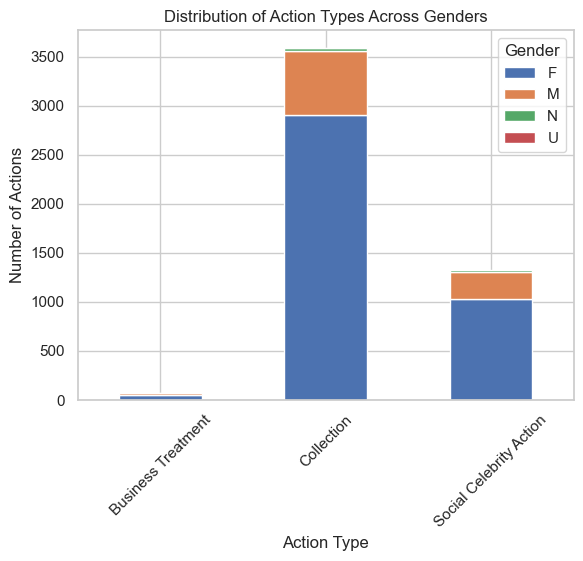

<Figure size 1200x600 with 0 Axes>

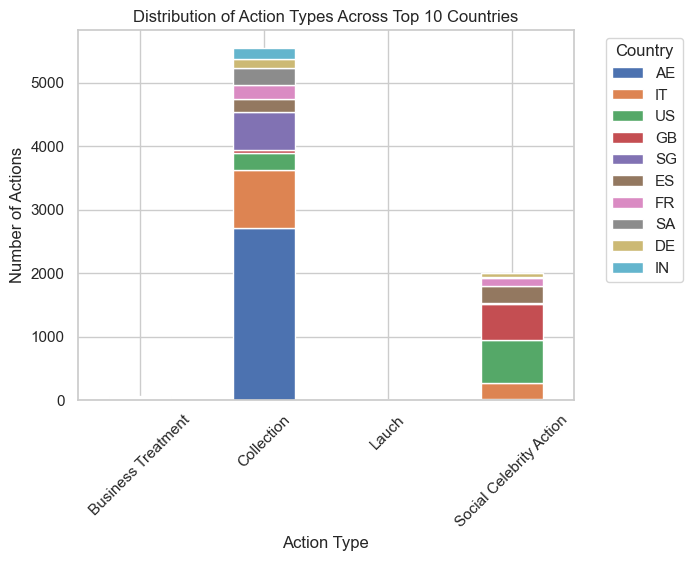

In [38]:

action_gender_insights = actions_clients_transactions.groupby(['action_type_label', 'client_gender']).size().unstack(fill_value=0)
action_country_insights = actions_clients_transactions.groupby(['action_type_label', 'client_country']).size().unstack(fill_value=0)

# Distribution of action types across different genders
plt.figure(figsize=(12, 6))
action_gender_insights.plot(kind='bar', stacked=True)
plt.title('Distribution of Action Types Across Genders')
plt.xlabel('Action Type')
plt.ylabel('Number of Actions')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# Distribution of action types across different countries (Top 10)
top_countries = action_country_insights.sum(axis=0).sort_values(ascending=False).head(10).index
action_country_insights_top = action_country_insights[top_countries]
plt.figure(figsize=(12, 6))
action_country_insights_top.plot(kind='bar', stacked=True)
plt.title('Distribution of Action Types Across Top 10 Countries')
plt.xlabel('Action Type')
plt.ylabel('Number of Actions')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
